## Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g., there is no data about grape types, wine brand, wine selling price, etc.).<br>

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g., there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So, it could be interesting to test feature selection methods.

### Attribute Information

Input variables (based on physicochemical tests):<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
<br>
Output variable (based on sensory data):<br>
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g., 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g., decision tree algorithms looking at the ROC curve and the AUC value.<br>

You need to build a classification model. 

### Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

## Dataset Link

https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

All the input variables in the dataset is Numerical.<br>
The output variable ('quality') is categorical with multiple categpries or classes (0-10).

### Exploratory Data Analysis

In [3]:
# Getting dimensions of the dataset
df.shape

(1599, 12)

The dataset contains 1599 rows and 12 columns. Out of the 12 columns, 11 are independent variables or input variables, while 1 is the target or output variable.

In [4]:
# Getting the column names
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

The independent variables are:<br>
'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'.<br>

The dependent or target variable is:<br>
'quality'

In [5]:
# Checking datatype of each column
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Since all the data are numerical the datatypes present in the dataset are float64 and int64.

In [6]:
# Checking for null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no na or NaN values present in the dataset.

In [7]:
# Checking for duplicate values
df.duplicated().sum()

240

The dataset has 240 duplicate rows, which need to be removed.

In [8]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1359, 12)

After removing duplicates, the number of rows is now 1359.

In [10]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


We can get a brief overview about the dataset from above. It provides information related to indexing, datatypes, non-nill values as well as memory usage.

In [11]:
# Number of unique values for each variable
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Since, most of the data is numeric and continuous there is very high number of unique values for each column, except 'quality', which is categorical. So, we will explore the frequency of occurrence of each value for 'quality' attribute only.<br>

Although the wines are scored from 0-10 (11 classes), we observe only 6 unique values for 'quality' that suggests that all the classes are not represented in the dataset.

In [12]:
# Frequency of occurence of each value in 'quality' column
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

We can observe that a vast majority of the wine quality is scored as either 5 or 6, followed by 7, then 4, 8 and 3.<br>

This shows that majority of the wine have a moderate score. The maximum score present in the dataset is 8 and the minimum is 3, indicating that very high quality or very poor quality wines are not represented in the dataset.

In [13]:
# Storing the numerical data (input data) in a different dataframe
num_cols = df.drop(columns='quality')
num_cols.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

The numerical columns can be stored in a separate list for later visualisations.

#### Transforming the problem to binary classification

In [14]:
# Feature transformation
df['quality_bin'] = df.quality.apply(lambda x: 1 if x>=7 else 0)

In [15]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  quality_bin  
0      9.4        5            0  
1      9.8        5            0  
2      9.8        5            0  
3      9.8        6            0  
5      9.4        5            0

To make this a binary classification problem, a new feature with only two categories ar classes can be created for the quality scores. If the score is greater than or equal to 7, the wine maybe considered as 'good' and given a score of 1, while a score of less than 7 maybe considered as bad and given a score of 0.

In [16]:
# Frequency of occurence of each value in 'quality_bin' column
df.quality_bin.value_counts()

0    1175
1     184
Name: quality_bin, dtype: int64

Based on a quality cut-off score of 7, there are only 184 wines that are classified as good while 1175 wines are classified as bad. There is huge class imbalance issue in this case.

#### Dataset Description

In [17]:
# Statistical summary of columns (numerical data)
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  quality_bin  
count  1359.000000  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252     0.135394  
std       0.155036     0.170667     1.082065     0.823578     0.342270  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000     0.000000  
50%       3.310000     0.620000    10.200000     6.000000     0.000000  
75%       3.400000     0.730000    11.100000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     8.000000     1.000000

Observations from the above description:<br>
- There are no missing values in any of the columns as the count is same for all.
-  The mean is greater than the median for all attributes except 'density' and 'pH'. This means that the data is slightly skewed to the righ in all these columns.
- For 'density' and 'pH' the mean and the median are almost equal and for 'citric acid' they are very close, which means there is no skew in the distribution of these variables.
- There maybe outliers present in the data as the max value and 75% values have high difference in some cases (e.g.: 'total sulfur dioxide').
- For 'quality_bin' the median is zero as most of the wines have a score of 0 or bad, while very few have the score 1.

#### Data Visualisation

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


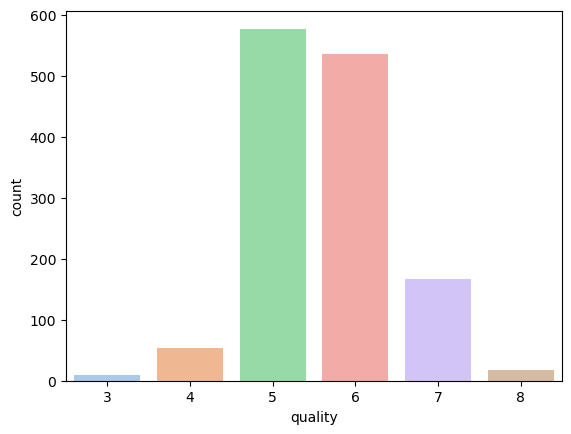

In [18]:
# Visualising the wine quality scores
print(df.quality.value_counts())
sns.countplot(x=df.quality, palette='pastel')
plt.show()

As observed before, the number of wines with qualty scores 5 and 6 are very high, which is followed by 7. The graph shows the same and confirms the previous observation.

0    1175
1     184
Name: quality_bin, dtype: int64


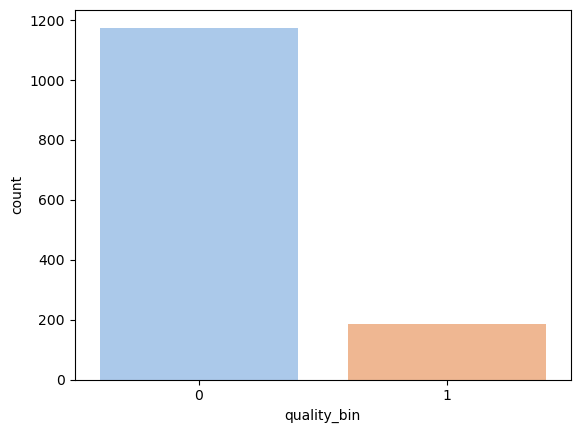

In [19]:
# Visualising the wine quality_bin scores
print(df.quality_bin.value_counts())
sns.countplot(x=df.quality_bin, palette='pastel')
plt.show()

Again, as observed before, the number of wines with 'quality_bin' score 0 is very high compared to the number of wines with 'quality-bin' score 1.

None of the other variables are categorical, so countplot is not required for them. We can observe their distribution with a different function.

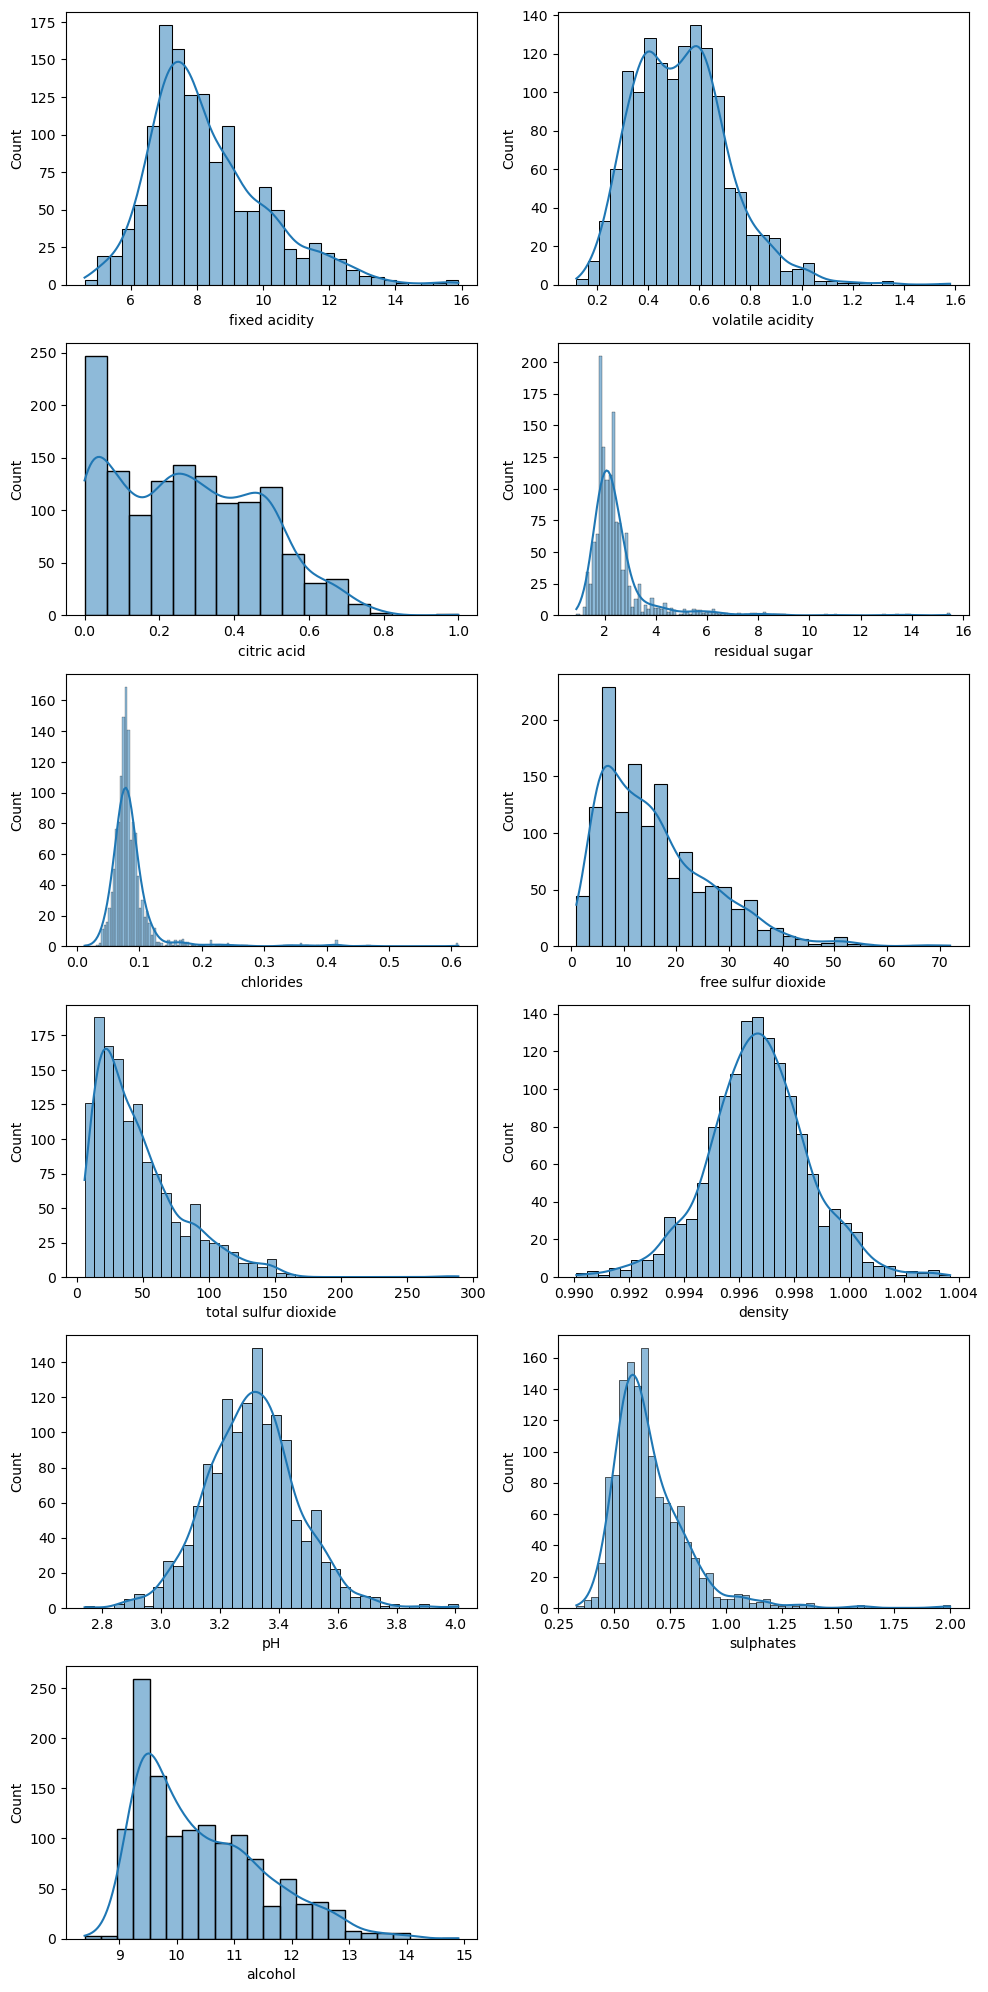

In [20]:
# Data distribution for numerical columns
plt.figure(figsize=(10, 20))
plot_num = 1
for col in num_cols:
    if plot_num <= 11:
        ax = plt.subplot(6, 2, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

From the above plots, we can conclude that all the variables look almost normally distributed.<br>
The variables - 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates' and 'alcohol' - are skewed to the right, while the variables- 'citric acid', 'density' and 'pH' do not show any skewness.

Henceforh, for all analysis the binary quality score ('quality_bin') will be used, as we want to classify the wines as good or poor quality.

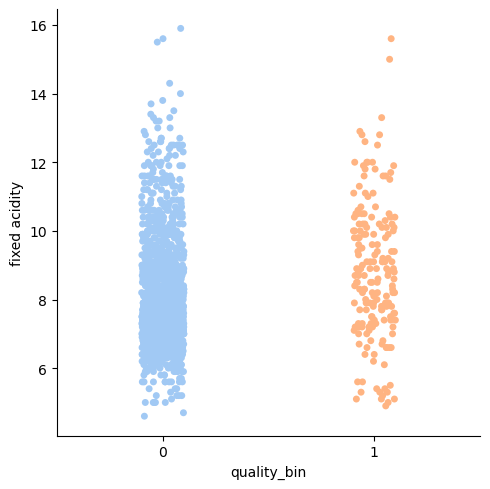

In [21]:
# Comparison between fixed acidity and quality
sns.catplot(x='quality_bin', y='fixed acidity', hue='quality_bin', data=df, palette='pastel')
plt.show()

According to this plot, we can see that there is not much difference between the good quality wines and the poor quality wines in terms of fixed acidity.

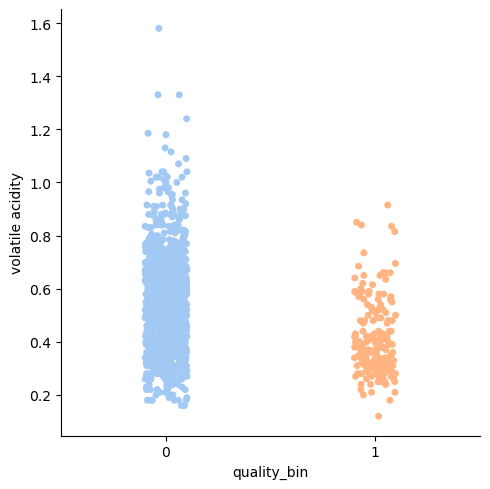

In [22]:
# Comparison between volatile acidity and quality
sns.catplot(x='quality_bin', y='volatile acidity', hue='quality_bin', data=df, palette='pastel')
plt.show()

From this plot, we can observe that the volatile acidity is higher for poor quality wines and lower for the good quality wines.

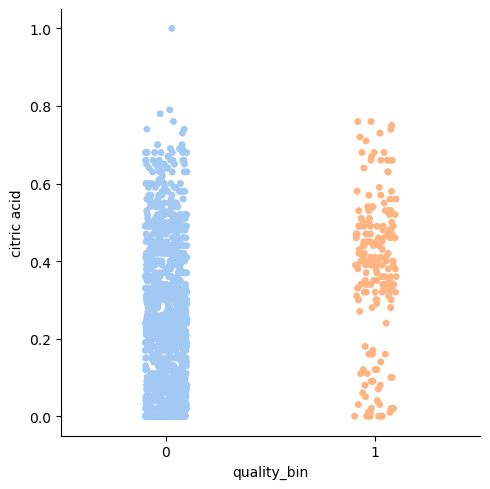

In [23]:
# Comparison between citric acid and quality
sns.catplot(x='quality_bin', y='citric acid', hue='quality_bin', data=df, palette='pastel')
plt.show()

Here, we can see that the citric acid is only slightly higher for poor quality wines, so there might not be much of a difference in the quality due to citric acid.

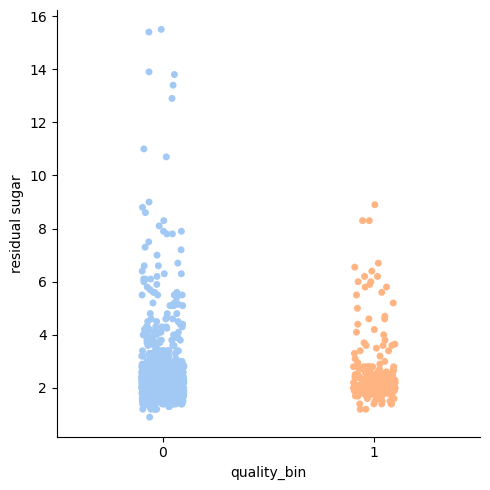

In [24]:
# Comparison between residual sugar and quality
sns.catplot(x='quality_bin', y='residual sugar', hue='quality_bin', data=df, palette='pastel')
plt.show()

We can observe that the residual sugar is higher for poor quality wines, while it is lower for good quality wines.

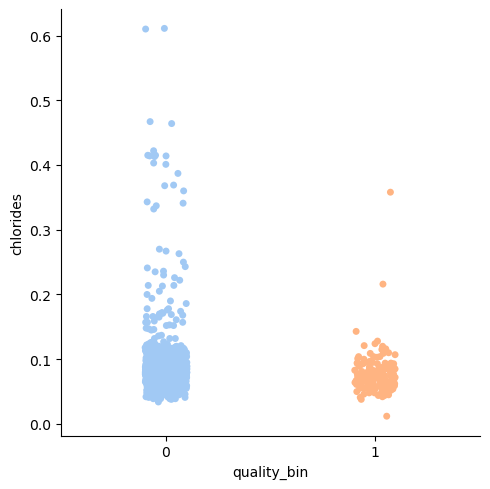

In [25]:
# Comparison between chlorides and quality
sns.catplot(x='quality_bin', y='chlorides', hue='quality_bin', data=df, palette='pastel')
plt.show()

Again, we can observe that chorides are higher for poor quality wines and lower for good quality wines.

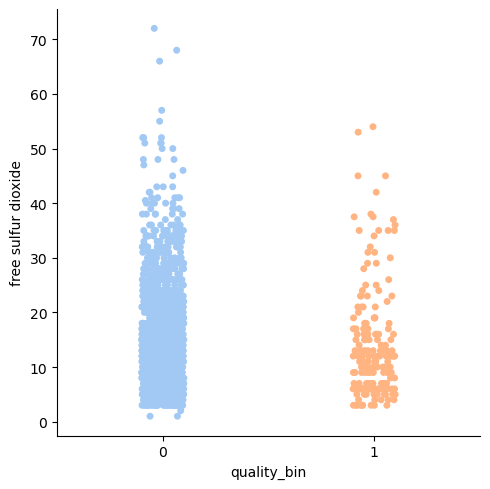

In [26]:
# Comparison between free sulfur dioxide and quality
sns.catplot(x='quality_bin', y='free sulfur dioxide', hue='quality_bin', data=df, palette='pastel')
plt.show()

From this plot, we can see that free sulfur dioxide is higher for poor quality wines compared to the good quality wines.

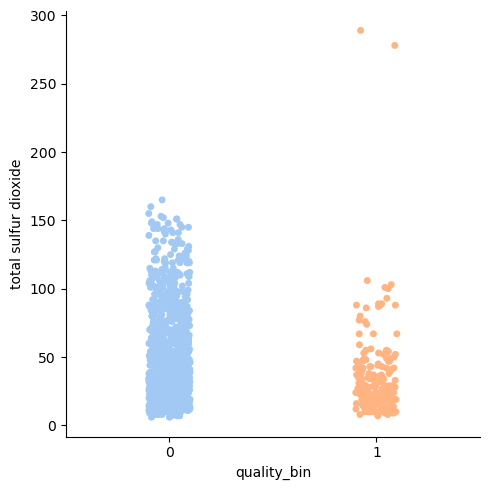

In [27]:
# Comparison between total sulfur dioxide and quality
sns.catplot(x='quality_bin', y='total sulfur dioxide', hue='quality_bin', data=df, palette='pastel')
plt.show()

Here, we find that total sulfur dioxide is generally higher for poor quality wines and lower for good quality wines. But there are a couple of cases, where the total sufur dioxide is very high for good quality wines. These cases are most likely to be outliers.

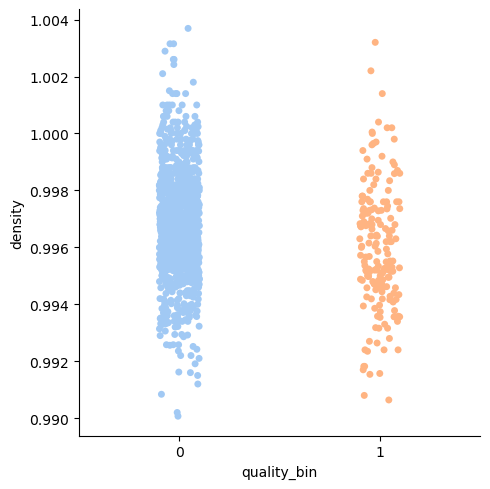

In [28]:
# Comparison between density and quality
sns.catplot(x='quality_bin', y='density', hue='quality_bin', data=df, palette='pastel')
plt.show()

The density values are almost similar for both good and poor quality wines, with poor quality wines sometimes having slightly higher or slightly lower densities.

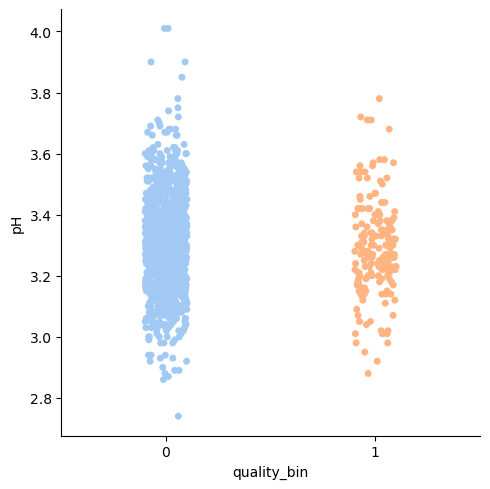

In [29]:
# Comparison between pH and quality
sns.catplot(x='quality_bin', y='pH', hue='quality_bin', data=df, palette='pastel')
plt.show()

Here, we observe that pH is generally higher for poor quality wines and lower for good quality wines.

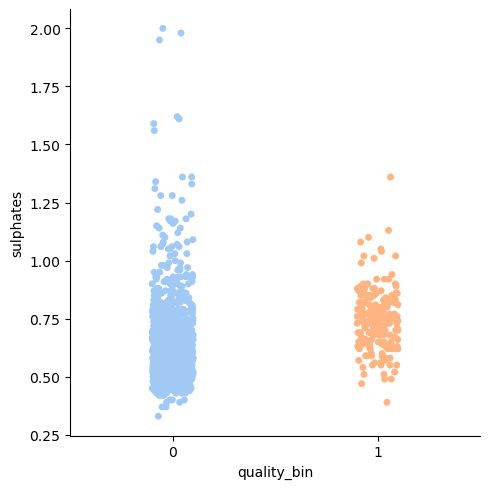

In [30]:
# Comparison between sulphates and quality
sns.catplot(x='quality_bin', y='sulphates', hue='quality_bin', data=df, palette='pastel')
plt.show()

Again, we can see that sulphates are higher for poor quality wines compared to good quality wines.

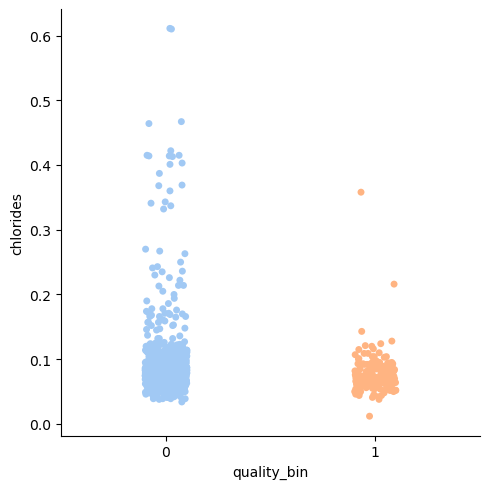

In [31]:
# Comparison between alcohol and quality
sns.catplot(x='quality_bin', y='chlorides', hue='quality_bin', data=df, palette='pastel')
plt.show()

We can observe that alcohol content is higher for poor quality wines as compared to good quality wines.

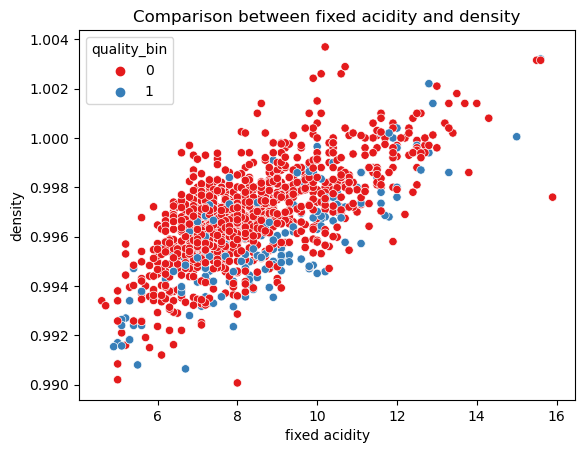

In [32]:
# Comparing density and fixed acidity
sns.scatterplot(x='fixed acidity', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between fixed acidity and density')
plt.show()

We can notice a positive linear relationship between fixed acidity and density.

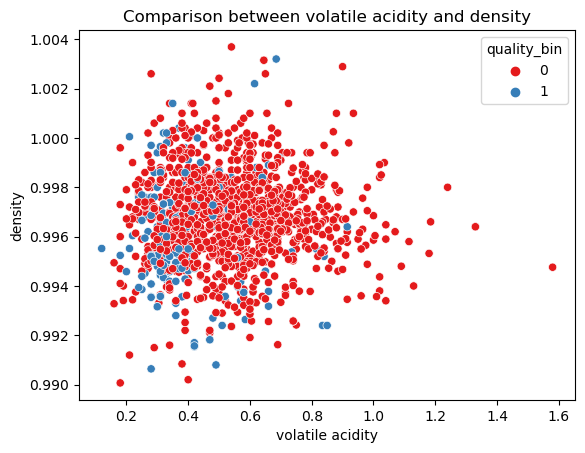

In [33]:
# Comparing density and volatile acidity
sns.scatterplot(x='volatile acidity', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between volatile acidity and density')
plt.show()

We can notice almost no relationship between volatile acidity and density.

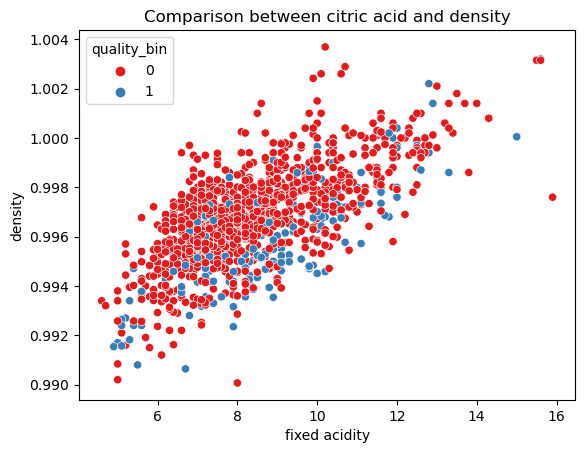

In [34]:
# Comparing density and citric acid
sns.scatterplot(x='fixed acidity', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between citric acid and density')
plt.show()

We can notice a positive linear relationship between citric acid and density.

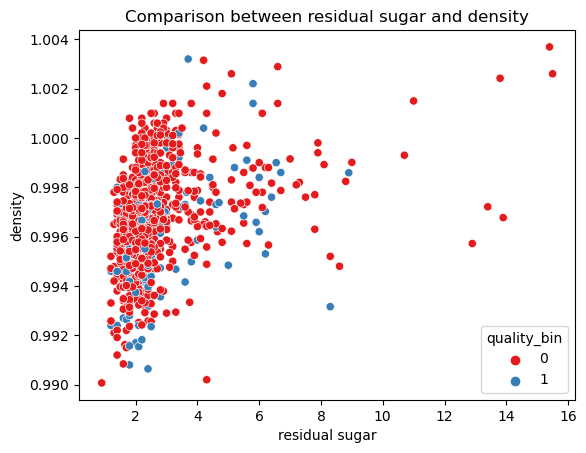

In [35]:
# Comparing density and residual sugar
sns.scatterplot(x='residual sugar', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between residual sugar and density')
plt.show()

There is a very weak positive linear relationship between residual sugar and density

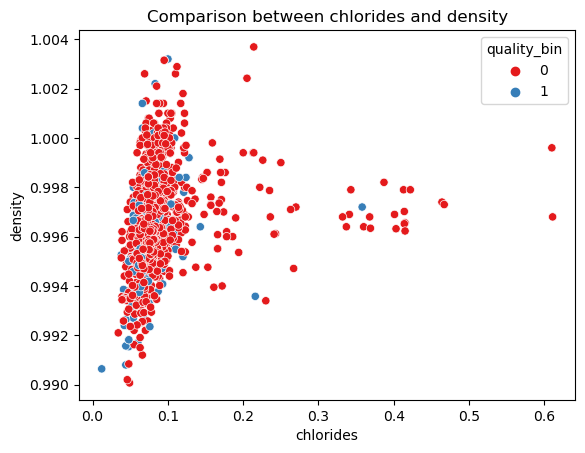

In [36]:
# Comparing density and chlorides
sns.scatterplot(x='chlorides', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between chlorides and density')
plt.show()

The relationship between chlorides and density is also observed to be weak.

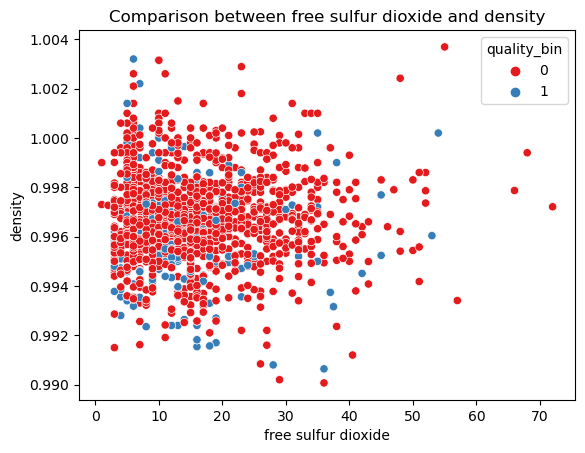

In [37]:
# Comparing density and free sulfur dioxide
sns.scatterplot(x='free sulfur dioxide', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between free sulfur dioxide and density')
plt.show()

There seems to be no correlation between free sulfur dioxide and density.

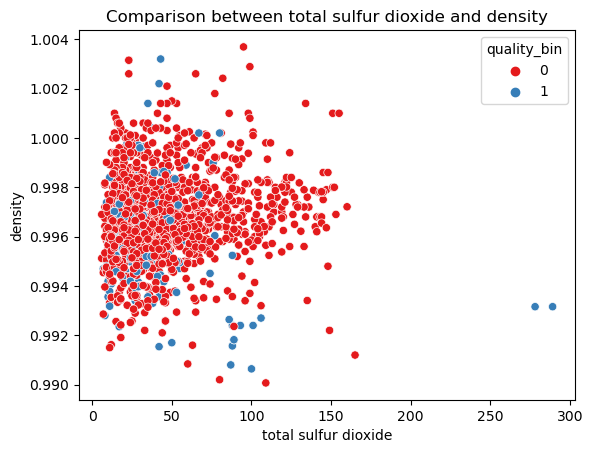

In [38]:
# Comparing density and total sulfur dioxide
sns.scatterplot(x='total sulfur dioxide', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between total sulfur dioxide and density')
plt.show()

There is almost no observed relationship between total sulfur dioxide and density

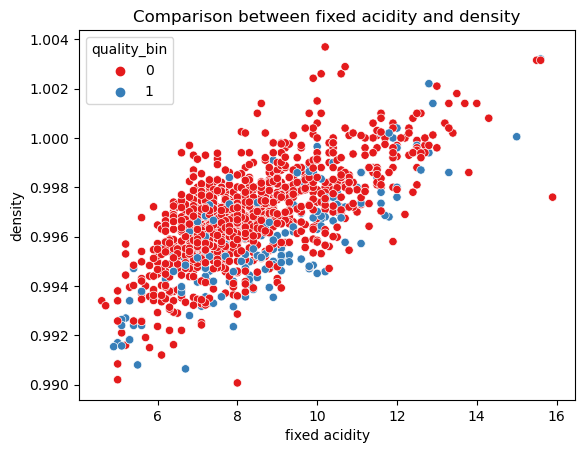

In [39]:
# Comparing density and fixed acidity
sns.scatterplot(x='fixed acidity', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between fixed acidity and density')
plt.show()

We can notice a linear relationship between fixed acidity and density.

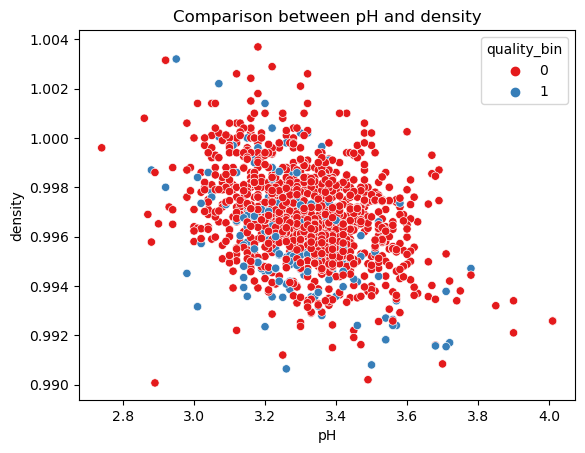

In [40]:
# Comparing density and pH
sns.scatterplot(x='pH', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between pH and density')
plt.show()

We can notice a linear relationship between fixed acidity and density.

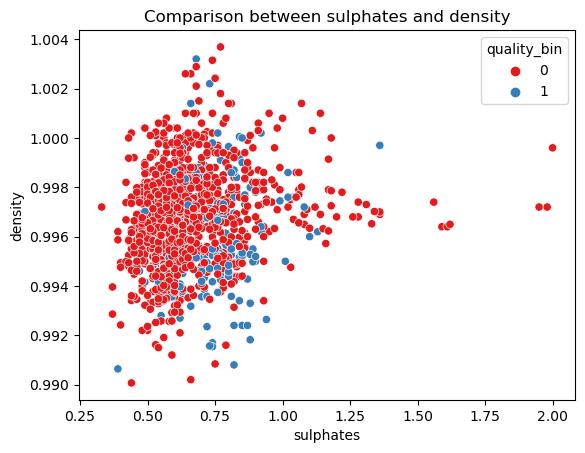

In [41]:
# Comparing density and sulphates
sns.scatterplot(x='sulphates', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between sulphates and density')
plt.show()

We can notice almost no linear relationship between sulphates and density.

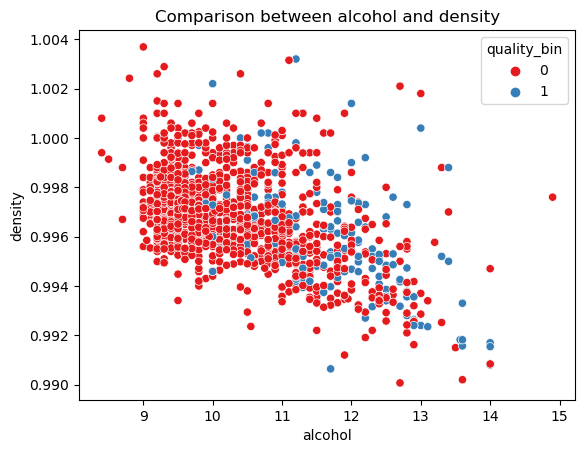

In [42]:
# Comparing density and alcohol
sns.scatterplot(x='alcohol', y='density', hue='quality_bin', data = df, palette = 'Set1')
plt.title('Comparison between alcohol and density')
plt.show()

We can notice a  weak negative linear relationship between alcohol and density.

In [43]:
df2 = df.drop(columns='quality')

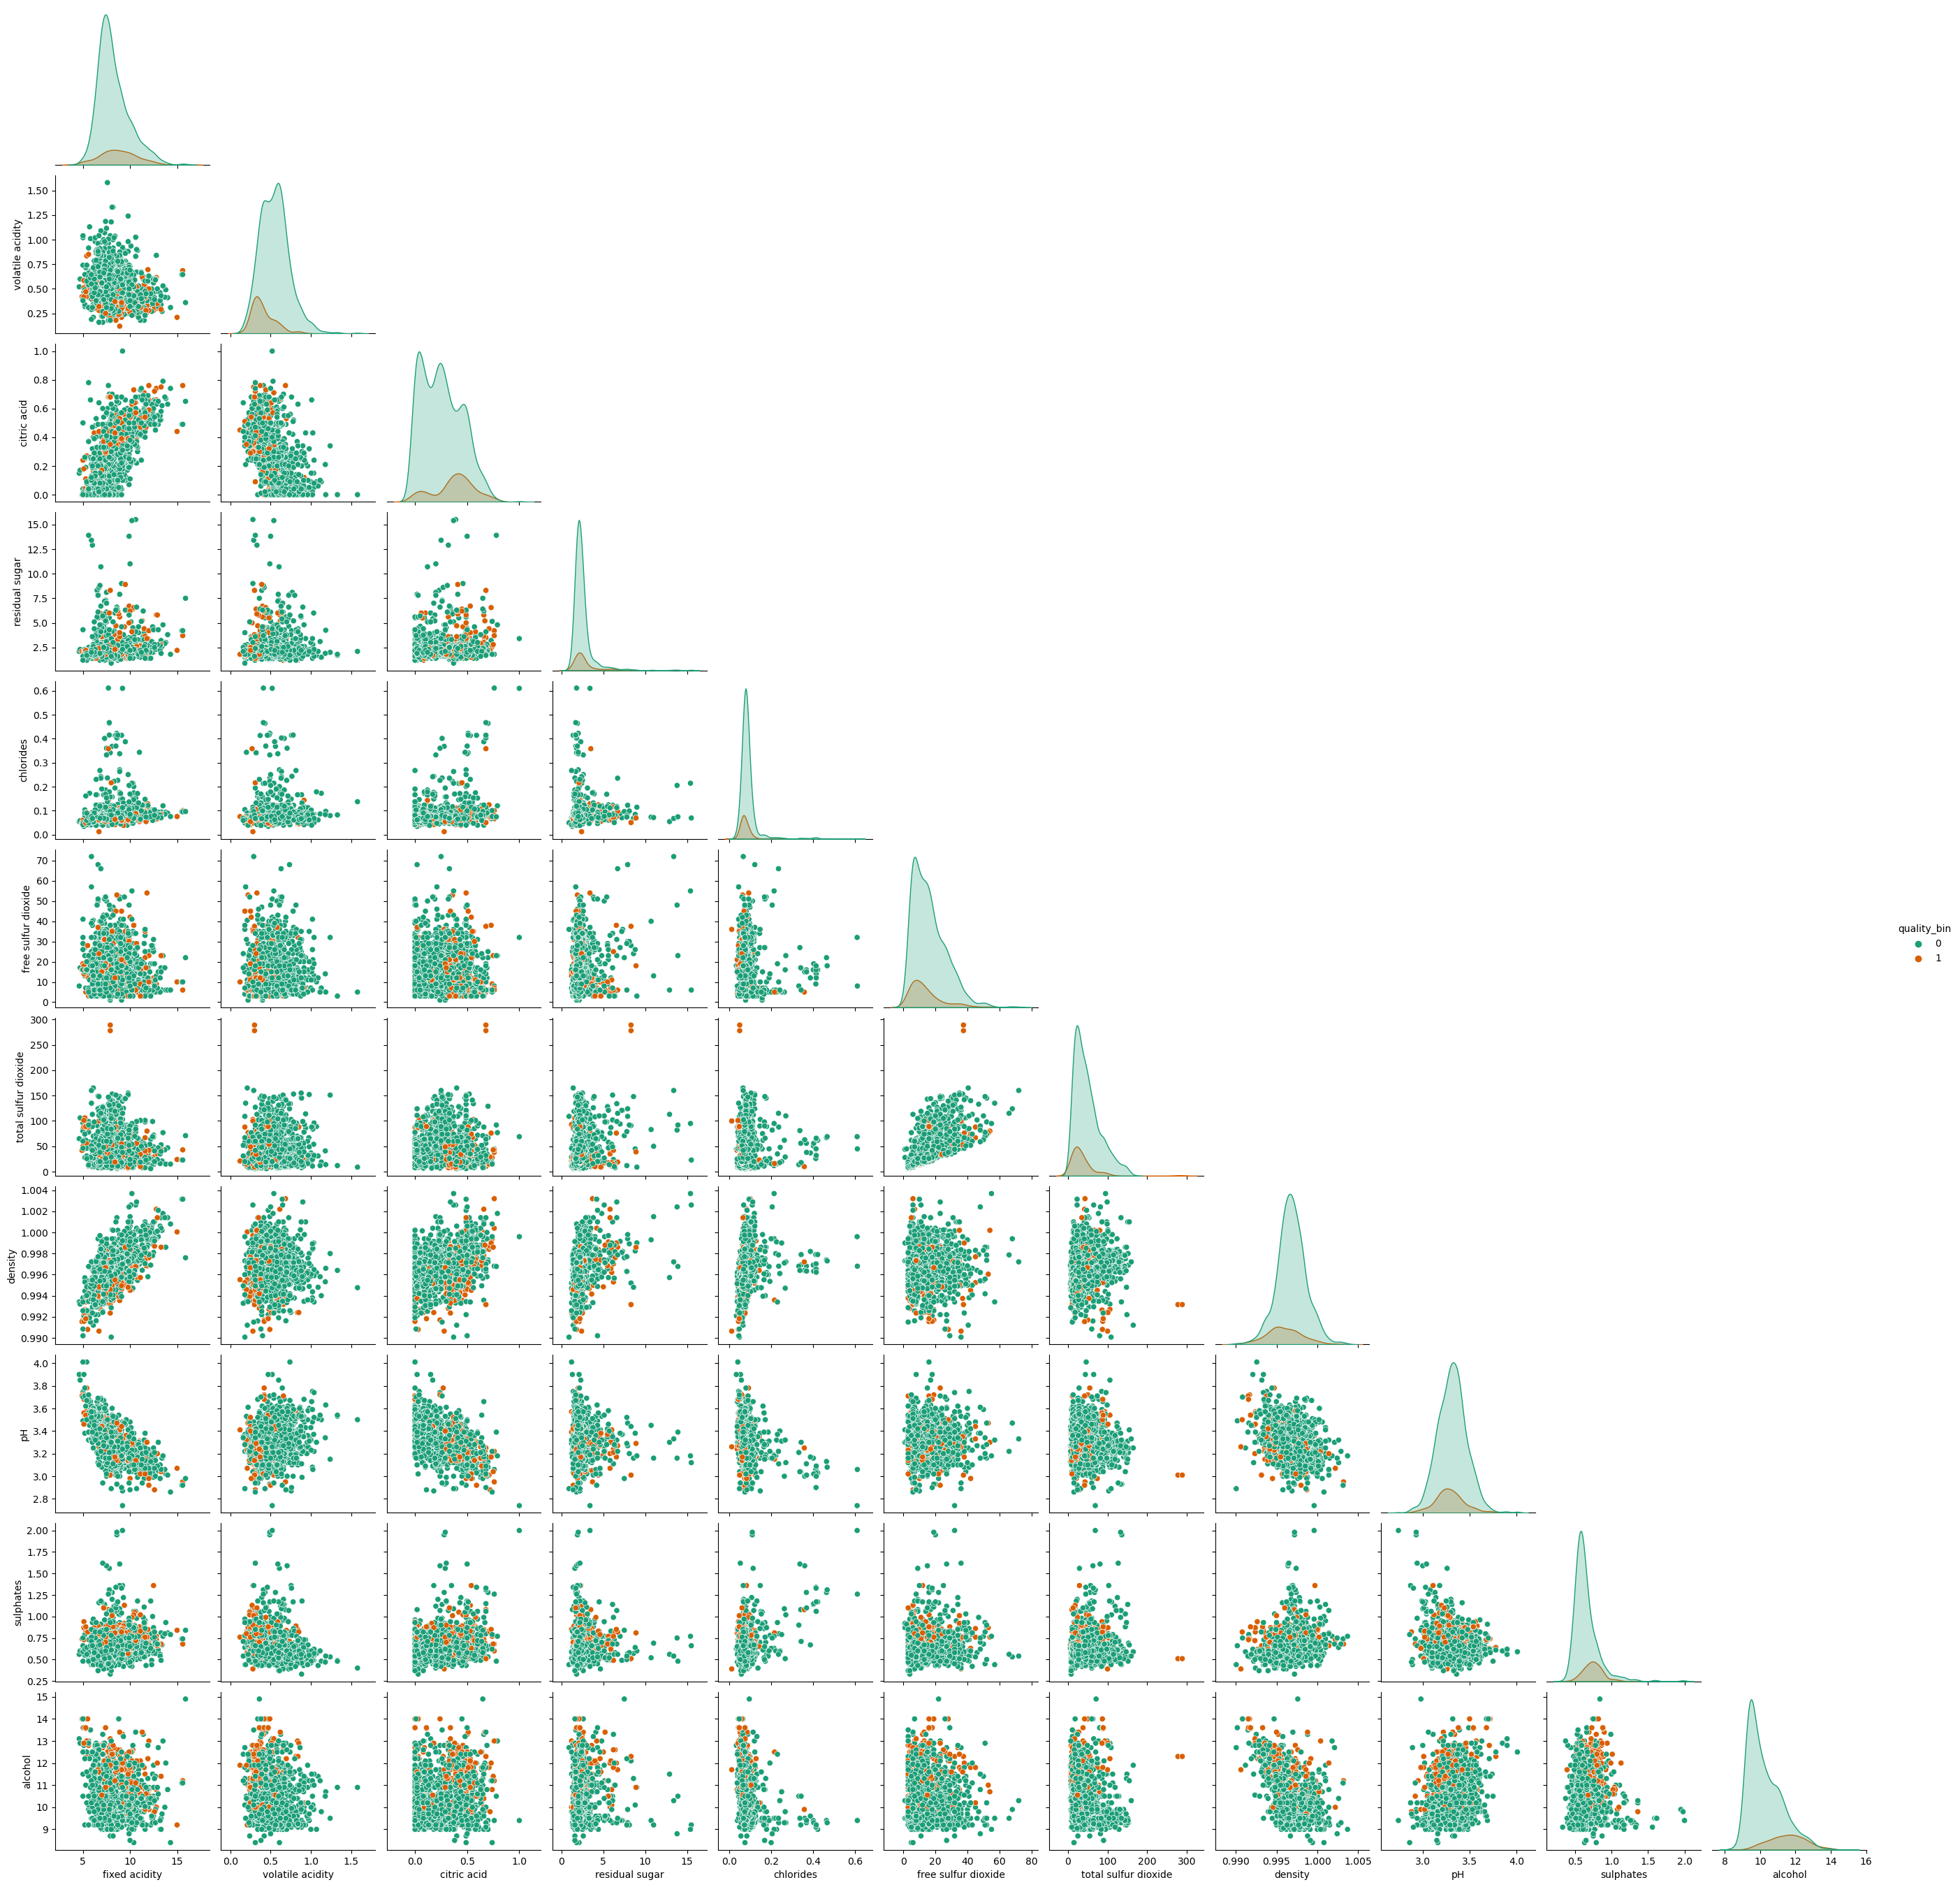

In [44]:
# Pairwise relation between variables with respect to the quality
sns.pairplot(df2, hue='quality_bin', palette='Dark2', corner = True)
plt.show()

Observations from paiplot:
- The attributes fixed acidity and density as well as free sulfur dioxide and total sulfur dioxide have a positive linear relationships.
- The fixed acidity and citric acid attributes have a negative linear relationship with pH and so does density and alcohol.
- Based on the scatterplots, there seem to be a few outliers, which can be identified from the box plots.

### Checking for outliers

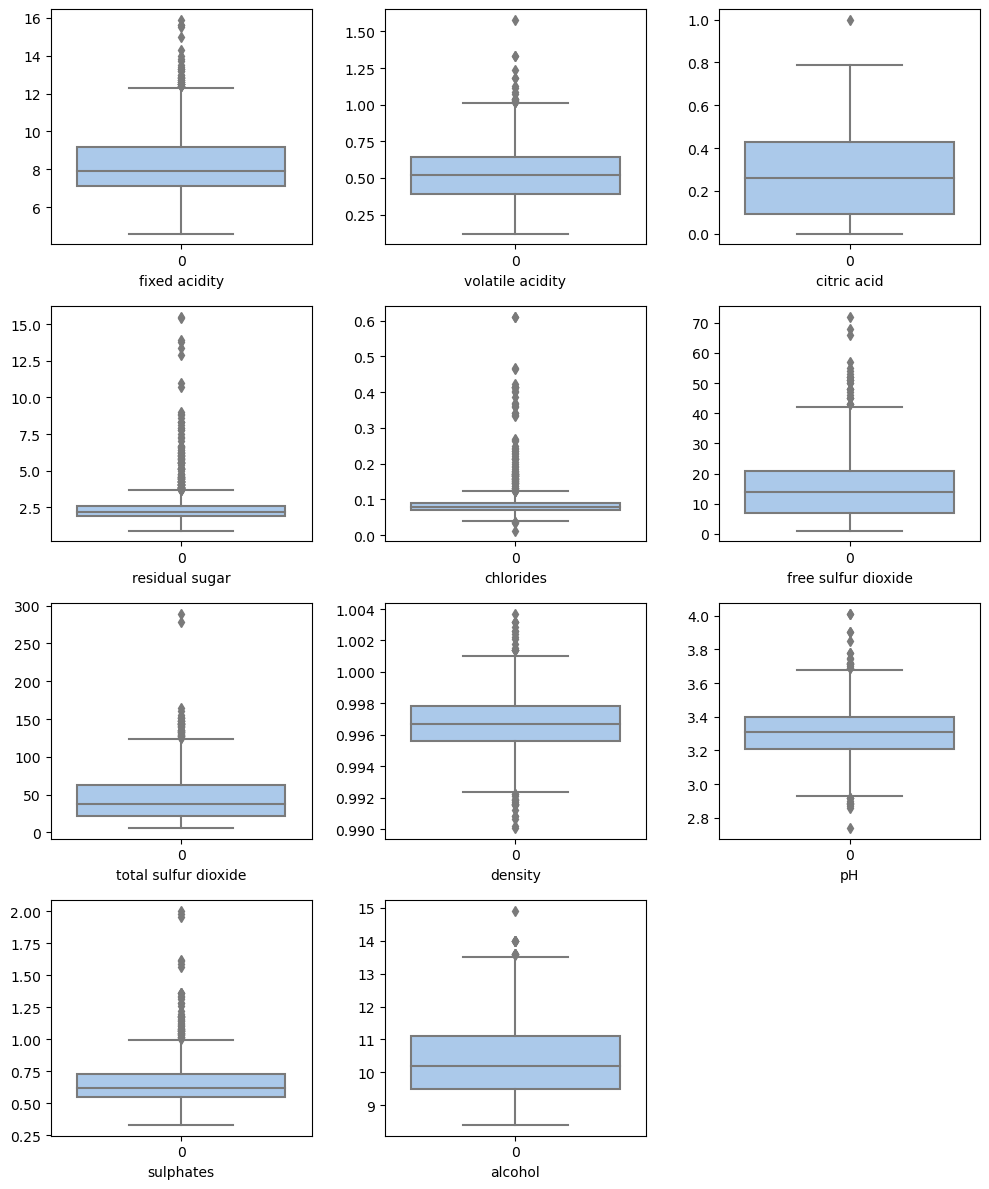

In [45]:
# Checking for outliers using boxplot
plt.figure(figsize=(10, 12))
plot_num = 1
for col in num_cols:
    if plot_num <= 11:
        ax = plt.subplot(4, 3, plot_num)
        sns.boxplot(df[col], palette='pastel')
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There are some visible outliers, but the values observed are still plausible. There are no negative values observed. So, in this case, we are not removing any outliers.

### Checking for skewness

In [46]:
df2.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality_bin             2.133662
dtype: float64

Except for density,  pH and citric acid, all the other columns are skewed. Since 'quality_bin' is categorical and our target variable, the skewness need not removed. Rest of the columns require transformation to remove skewness.

In [47]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [48]:
# Removing skewness
columns = df2.columns.tolist()
columns.remove('quality_bin')
columns.remove('citric acid')
columns.remove('density')
columns.remove('pH')

skew_transform = {}

for col in columns:
    transformed_log = np.log(df2[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df2[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df2[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df2[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df2[col])                      # Cube Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [49]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

fixed acidity  volatile acidity  residual sugar  \
Log Transformation               0.348419         -0.330430        1.763289   
Box-Cox Transformation           0.488956          0.385526        2.475999   
Inverse Transformation           0.252181          1.554967       -0.182912   
Yeo Johnson Transformation       0.001881          0.008302       -0.001713   
Cube Root Transformation         0.543481          0.009328        2.490603   

                            chlorides  free sulfur dioxide  \
Log Transformation           1.885558            -0.219826   
Box-Cox Transformation       5.004319             0.090191   
Inverse Transformation       4.269093             3.255936   
Yeo Johnson Transformation  -0.061854            -0.009888   
Cube Root Transformation     3.065217             0.246108   

                            total sulfur dioxide  sulphates   alcohol  
Log Transformation                     -0.078074   0.960399  0.662627  
Box-Cox Transformation                  0.165055   1.726855  0.704339  
Inverse Transformation                  1.522798  -0.069449 -0.484275  
Yeo Johnson Transformation             -0.003893   0.014621  0.116613  
Cube Root Transformation                0.392382   1.349370  0.725828

From the above analysis, it is evident that Yeo Johnson Transformation was able to reduce the skewness within acceptable range, for all the variables. So we should use the Yeo Johnson Transformation to normalise our data.

In [50]:
for col in columns:
    transformed_col, _ = stats.yeojohnson(df2[col])
    df2[col] = transformed_col

In [51]:
df2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       1.034526          0.414381         0.00        0.434792   0.039707   
1       1.043126          0.471563         0.00        0.454783   0.043935   
2       1.043126          0.434724         0.04        0.447778   0.042944   
3       1.095435          0.219428         0.56        0.434792   0.039471   
5       1.034526          0.400013         0.00        0.430634   0.039471   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0             2.704016              3.709860   0.9978  3.51   0.201957   
1             3.641557              4.438305   0.9968  3.20   0.211892   
2             3.047181              4.204343   0.9970  3.26   0.209752   
3             3.189602              4.318369   0.9980  3.16   0.203891   
5             2.887073              3.882357   0.9978  3.51   0.201957   

    alcohol  quality_bin  
0  0.267951            0  
1  0.267956            0  
2  0.267956            0  
3  0.267956            0  
5  0.267951            0

In [52]:
df2.skew()

fixed acidity           0.001884
volatile acidity        0.008311
citric acid             0.312726
residual sugar         -0.001715
chlorides              -0.061923
free sulfur dioxide    -0.009899
total sulfur dioxide   -0.003897
density                 0.044778
pH                      0.232032
sulphates               0.014637
alcohol                 0.116742
quality_bin             2.133662
dtype: float64

Now the skewness for all variables is in acceptable range.

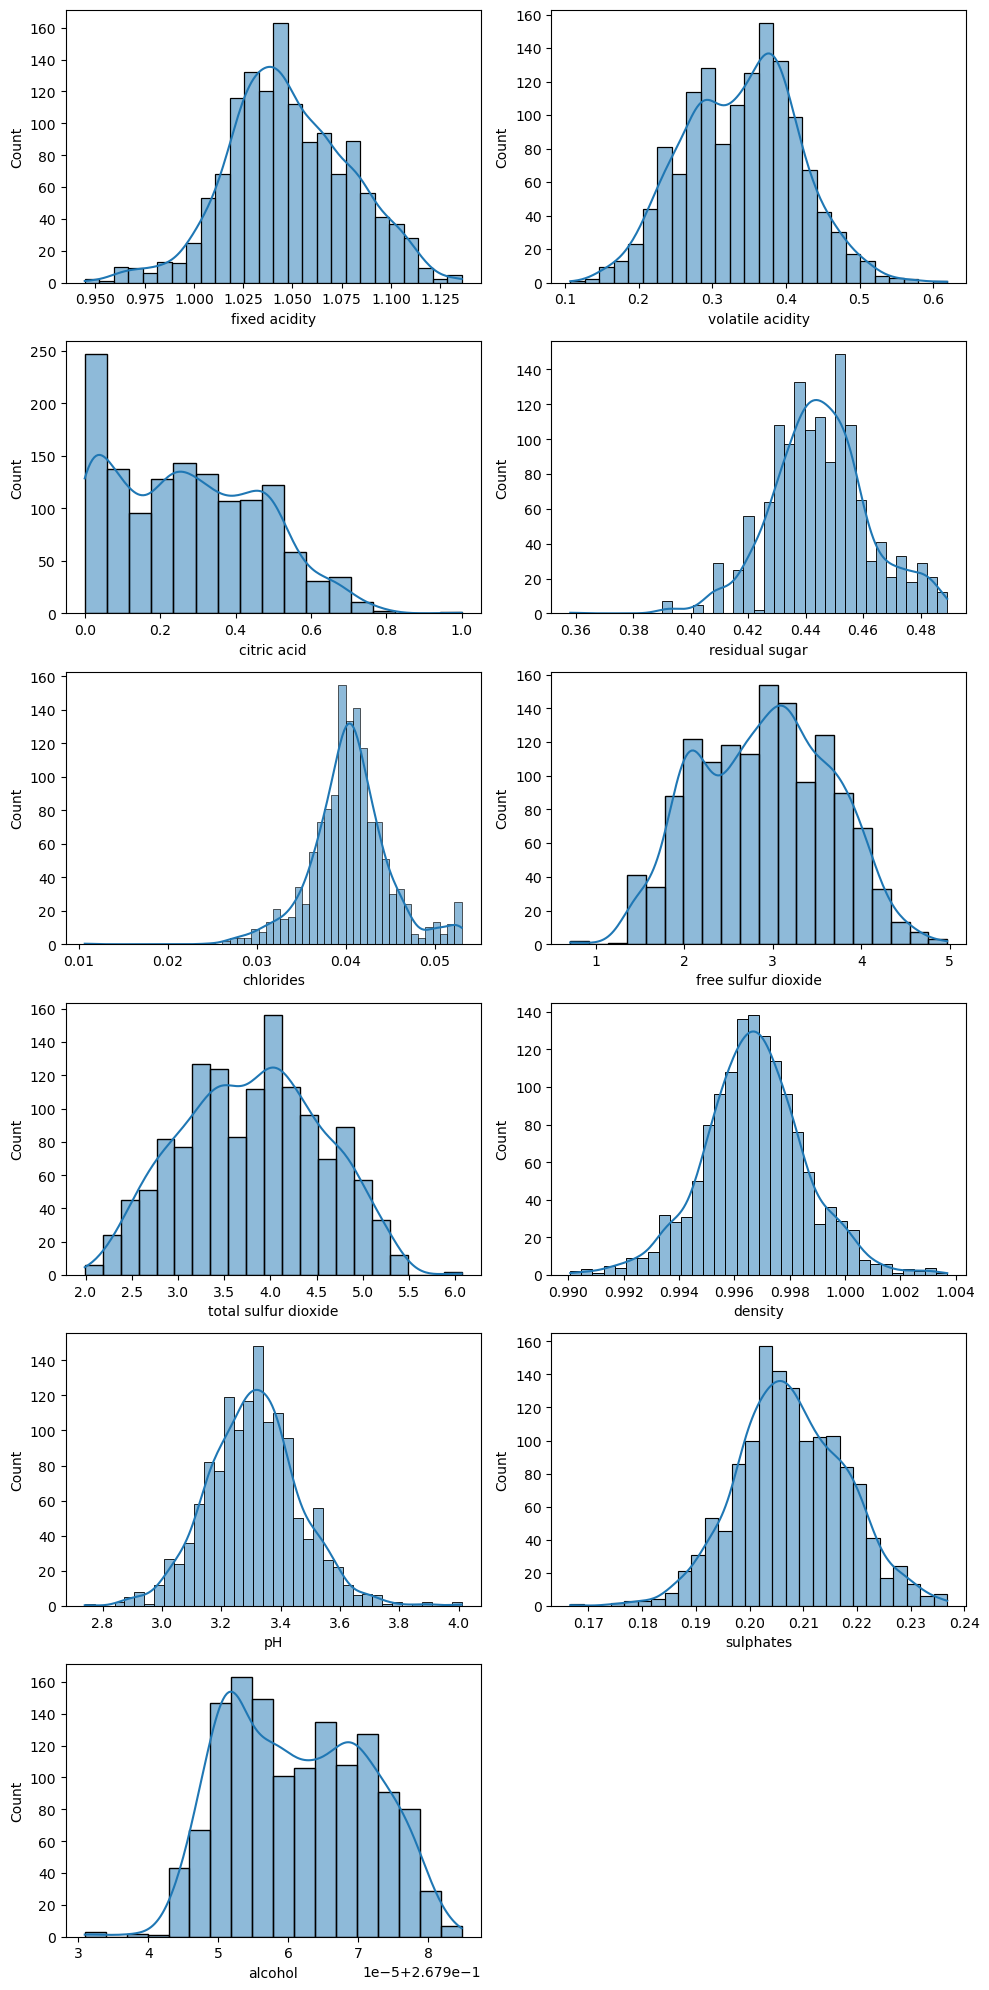

In [53]:
# Data distribution after removing skewness for numerical columns
plt.figure(figsize=(10, 20))
plot_num = 1
for col in num_cols:
    if plot_num <= 11:
        ax = plt.subplot(6, 2, plot_num)
        sns.histplot(df2[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The distributions observed show that the skewness has been reduced.

### Correlation analysis

In [54]:
df2.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.258282     0.649455   
volatile acidity          -0.258282          1.000000    -0.570594   
citric acid                0.649455         -0.570594     1.000000   
residual sugar             0.215529          0.041101     0.177620   
chlorides                  0.258049          0.153181     0.147934   
free sulfur dioxide       -0.157539          0.009326    -0.068310   
total sulfur dioxide      -0.103674          0.086406     0.013393   
density                    0.677983          0.038749     0.357962   
pH                        -0.718563          0.241623    -0.550310   
sulphates                  0.201729         -0.317552     0.344126   
alcohol                   -0.099824         -0.211835     0.093550   
quality_bin                0.100031         -0.285946     0.203561   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.215529   0.258049            -0.157539   
volatile acidity            0.041101   0.153181             0.009326   
citric acid                 0.177620   0.147934            -0.068310   
residual sugar              1.000000   0.184791             0.080257   
chlorides                   0.184791   1.000000            -0.006268   
free sulfur dioxide         0.080257  -0.006268             1.000000   
total sulfur dioxide        0.144559   0.093130             0.783395   
density                     0.422456   0.427565            -0.030456   
pH                         -0.093505  -0.282382             0.078656   
sulphates                   0.033040   0.133576             0.052039   
alcohol                     0.097479  -0.337590            -0.097501   
quality_bin                 0.055689  -0.170389            -0.084402   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103674  0.677983 -0.718563   0.201729   
volatile acidity                  0.086406  0.038749  0.241623  -0.317552   
citric acid                       0.013393  0.357962 -0.550310   0.344126   
residual sugar                    0.144559  0.422456 -0.093505   0.033040   
chlorides                         0.093130  0.427565 -0.282382   0.133576   
free sulfur dioxide               0.783395 -0.030456  0.078656   0.052039   
total sulfur dioxide              1.000000  0.108609 -0.031206   0.027718   
density                           0.108609  1.000000 -0.355617   0.167864   
pH                               -0.031206 -0.355617  1.000000  -0.127184   
sulphates                         0.027718  0.167864 -0.127184   1.000000   
alcohol                          -0.265659 -0.473738  0.213903   0.170562   
quality_bin                      -0.166618 -0.158052 -0.054131   0.260198   

                       alcohol  quality_bin  
fixed acidity        -0.099824     0.100031  
volatile acidity     -0.211835    -0.285946  
citric acid           0.093550     0.203561  
residual sugar        0.097479     0.055689  
chlorides            -0.337590    -0.170389  
free sulfur dioxide  -0.097501    -0.084402  
total sulfur dioxide -0.265659    -0.166618  
density              -0.473738    -0.158052  
pH                    0.213903    -0.054131  
sulphates             0.170562     0.260198  
alcohol               1.000000     0.391204  
quality_bin           0.391204     1.000000

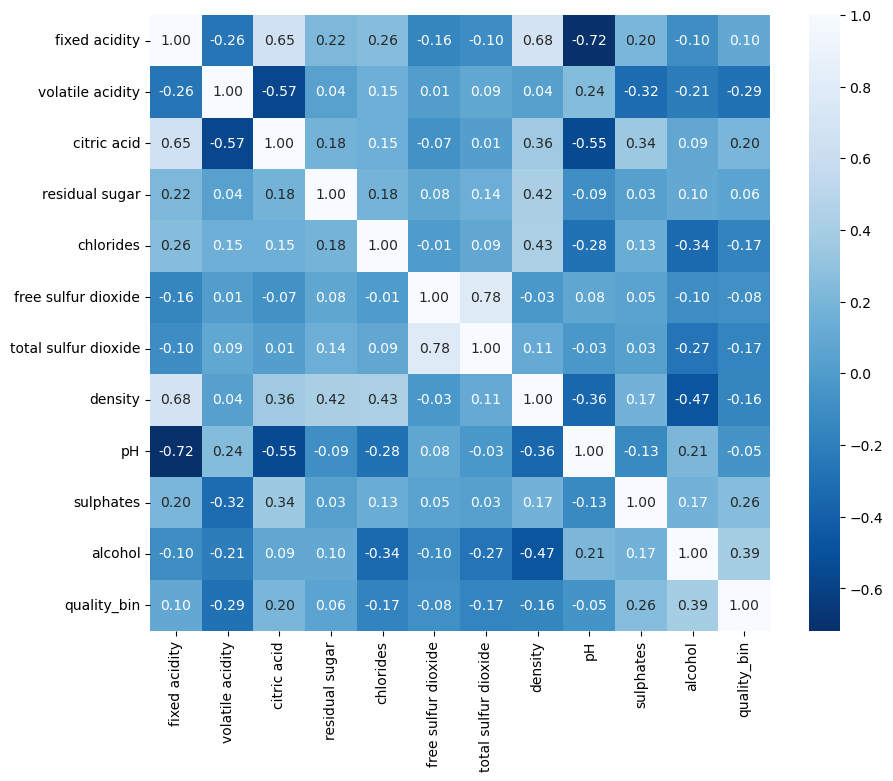

In [55]:
# Heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='Blues_r')
plt.show()

Observations from correlation heatmap:
- The relationships of the input features with the target variable are weak.
- The variable with the highest correlation with the quality of wine is alcohol with correlation of 0.39 only.
- There is a high positive correlation observed between free sulfur dioxide and total sulfur dioxide.
- There is a high negative correlation between pH and fixed acidity.

In [56]:
df2.corr()['quality_bin'].sort_values(ascending=False)

quality_bin             1.000000
alcohol                 0.391204
sulphates               0.260198
citric acid             0.203561
fixed acidity           0.100031
residual sugar          0.055689
pH                     -0.054131
free sulfur dioxide    -0.084402
density                -0.158052
total sulfur dioxide   -0.166618
chlorides              -0.170389
volatile acidity       -0.285946
Name: quality_bin, dtype: float64

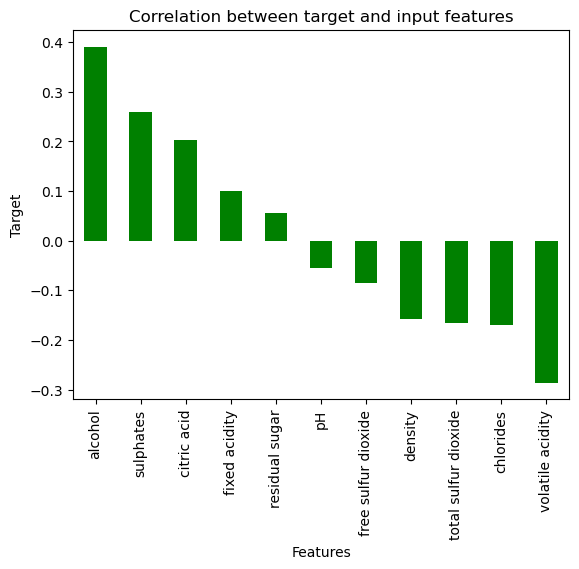

In [57]:
# Visualising the correlation between target and input features
df2.corr()['quality_bin'].sort_values(ascending=False).drop(['quality_bin']).plot(kind='bar', color='g')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

From the plot, it is evident that residual sugar and pH have the lowest correlation with the quality of the wines, while alcohol and volatile acidity have the highest correlation with the quality.

### Separating features and label

In [58]:
x = df2.drop('quality_bin', axis=1)
y = df2['quality_bin']

#### Feature scaling

In [59]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.439412          0.978091    -1.393258       -0.602600  -0.166676   
1      -0.161475          1.720040    -1.393258        0.560720   0.778512   
2      -0.161475          1.242047    -1.188617        0.153076   0.557116   
3       1.529010         -1.551503     1.471711       -0.602600  -0.219369   
4      -0.439412          0.791661    -1.393258       -0.844564  -0.219369   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.269573             -0.128948  0.584003  1.291872  -0.582775   
1             0.992495              0.841796  0.048737 -0.708395   0.400130   
2             0.192377              0.530012  0.155790 -0.321247   0.188379   
3             0.384096              0.681966  0.691057 -0.966495  -0.391438   
4            -0.023152              0.100926  0.584003  1.291872  -0.582775   

    alcohol  
0 -1.068157  
1 -0.499290  
2 -0.499290  
3 -0.499290  
4 -1.068157

Feature scaling reduces the bias in the data.

### Checking Variance Inflation factor (VIF)

In [60]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features       VIF
0          fixed acidity  6.713062
1       volatile acidity  1.848323
2            citric acid  2.853662
3         residual sugar  1.750625
4              chlorides  1.400220
5    free sulfur dioxide  2.878245
6   total sulfur dioxide  3.235125
7                density  6.015204
8                     pH  3.252454
9              sulphates  1.361847
10               alcohol  2.878230

From the VIF values, it is clear that both fixed acidity and density have high collinearity with other features. In order to avoid the issue of multicollinearity the features may need to be removed. But the VIF is not very high above the threshold, so we can proceed without dropping any columns.

### Model building

#### Splitting data into Training and Testing

In [61]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [62]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.3,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.9019607843137255
Random state for best accuracy: 103


In [63]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

#### Handling Class Imbalance

In [64]:
y_train.value_counts()

0    822
1    129
Name: quality_bin, dtype: int64

There is still an imbalance in the training data, which will affect the accuracy of the classification model. This issue can be resolved by oversampling (creating new data for the class with less number of values).<br>

Oversampling is done after splitting the data so that we don't create any new data for testing the model.

#### Oversampling using SMOTE

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # choosing random state for reproducible results
x1, y1 = sm.fit_resample(x_train, y_train)

In [66]:
y1.value_counts()

0    822
1    822
Name: quality_bin, dtype: int64

The imbalance issue is resolved and both classes are equally represented in the training data now.

#### Classification models

In [67]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [68]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

Model  Accuracy
5                Extra Trees  0.887255
4              Random Forest  0.877451
8                    XGBoost  0.877451
9                   CatBoost  0.870098
7          Gradient Boosting  0.865196
1  Support Vector Classifier  0.850490
6                   AdaBoost  0.848039
0        Logistic Regression  0.843137
3              Decision Tree  0.840686
2                        KNN  0.786765

Based on the results from all the models, Extra Trees model seems to perform the best. We can visualise the confusion matrices and check the classification reports for better understanding of the classification models.

#### Confusion matrices

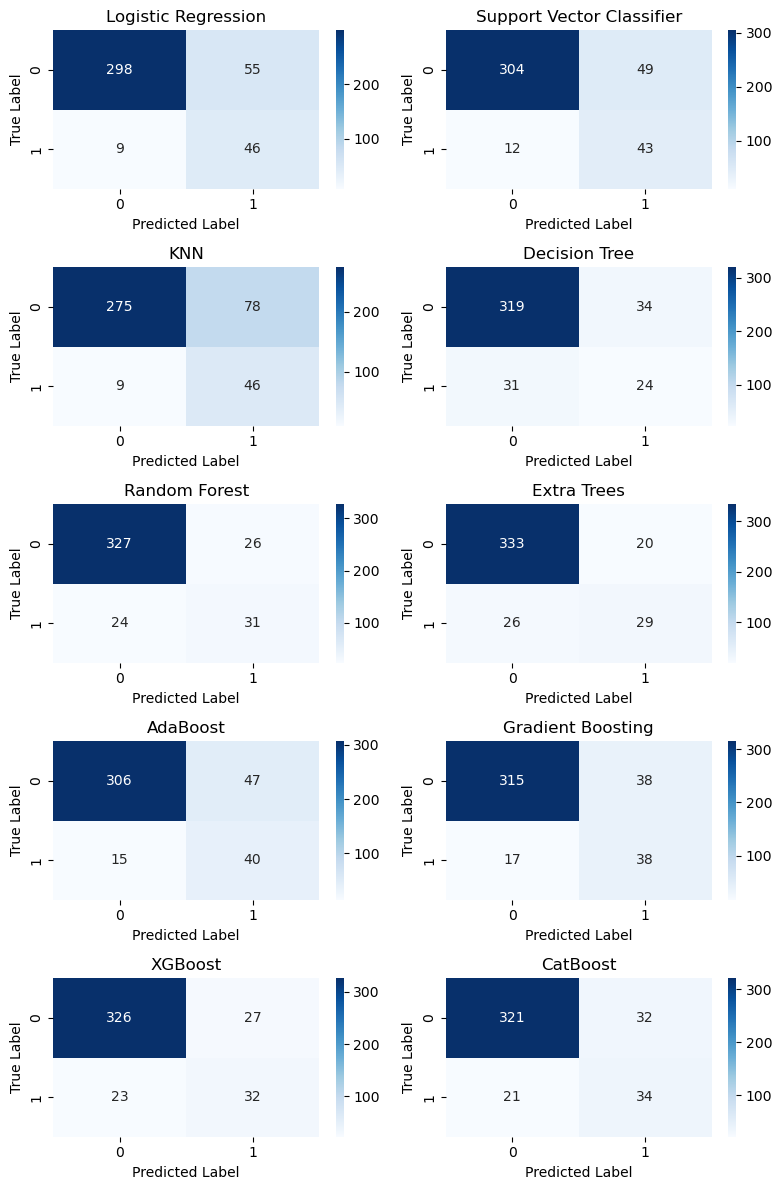

In [69]:
plt.figure(figsize=(8, 12))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(5, 2, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification reports

In [70]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       353
           1       0.46      0.84      0.59        55

    accuracy                           0.84       408
   macro avg       0.71      0.84      0.75       408
weighted avg       0.90      0.84      0.86       408

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       353
           1       0.47      0.78      0.59        55

    accuracy                           0.85       408
   macro avg       0.71      0.82      0.75       408
weighted avg       0.90      0.85      0.87       408

------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       353
           1       0.37      0.84      0.51        55

    accura

From the classification reports, we can find that for XGBoost model both precision and recall scores are high along with accuracy.

#### Using Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x1, y1, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

Model  CV Accuracy  Accuracy  Difference
6                   AdaBoost     0.850988  0.848039    0.002949
1  Support Vector Classifier     0.868628  0.850490    0.018138
3              Decision Tree     0.874101  0.852941    0.021160
7          Gradient Boosting     0.889315  0.865196    0.024119
0        Logistic Regression     0.810227  0.843137    0.032910
5                Extra Trees     0.936135  0.889706    0.046429
4              Random Forest     0.928849  0.879902    0.048947
9                   CatBoost     0.920330  0.870098    0.050231
8                    XGBoost     0.932495  0.877451    0.055044
2                        KNN     0.860718  0.786765    0.073953

The AdaBoost model has the least difference between Cross Validation Accuracy and Test Accuracy. So this is the best model as it is the least overfitting model.

#### Hyper Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:

params = {
    'random_state': [0, 10, 20, 50],
    'n_estimators': [10, 50, 100, 500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
}

In [75]:
gcv = GridSearchCV(AdaBoostClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100, 500],
                         'random_state': [0, 10, 20, 50]},
             scoring='accuracy')

In [76]:
best_params = gcv.best_params_
best_params

{'learning_rate': 1.0, 'n_estimators': 500, 'random_state': 0}

In [77]:
model = AdaBoostClassifier(**best_params)
model.fit(x1, y1)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8602941176470589


The final accuracy of the model is around 86%.

#### Plotting ROC for the best model

In [78]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

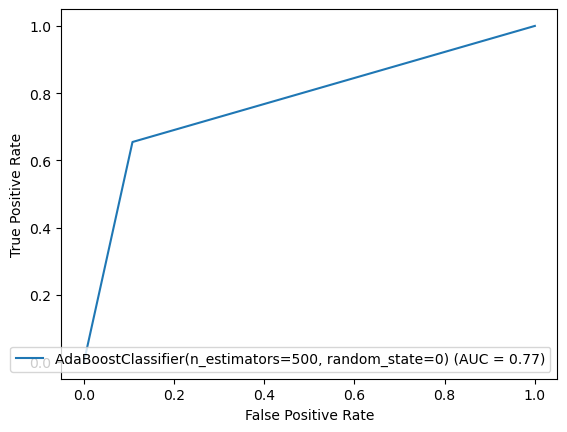

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model)
display.plot()

The AUC value for the best model is 0.77.

### Saving the model

In [80]:
import pickle

In [81]:
filename = 'final_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#### Predicting using the saved model

In [82]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [83]:
df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
df.head(20)

Actual  Predicted
0        0          0
1        1          1
2        0          0
3        1          1
4        0          0
5        0          0
6        0          0
7        0          1
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          1
14       1          1
15       1          1
16       0          0
17       0          0
18       0          0
19       0          0

These are the final predictions